In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        # Flatten layer
        layers.Flatten(),
        # Fully connected layers
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

def train_and_evaluate_model(train_images, train_labels, test_images, test_labels, num_epochs=5):
    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Reshape images for CNN input (add channel dimension)
    train_images = train_images.reshape((-1, 28, 28, 1))
    test_images = test_images.reshape((-1, 28, 28, 1))

    # Create the model
    model = create_model()

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=num_epochs, verbose=1)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

    print(f"Test accuracy: {test_acc}")

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 52s 26ms/step - loss: 0.1424 - accuracy: 0.9562
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0443 - accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0317 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0185 - accuracy: 0.9939
313/313 - 2s - loss: 0.0268 - accuracy: 0.9919 - 2s/epoch - 8ms/step
Test accuracy: 0.9919000267982483
313/313 [==============================] - 3s 8ms/step


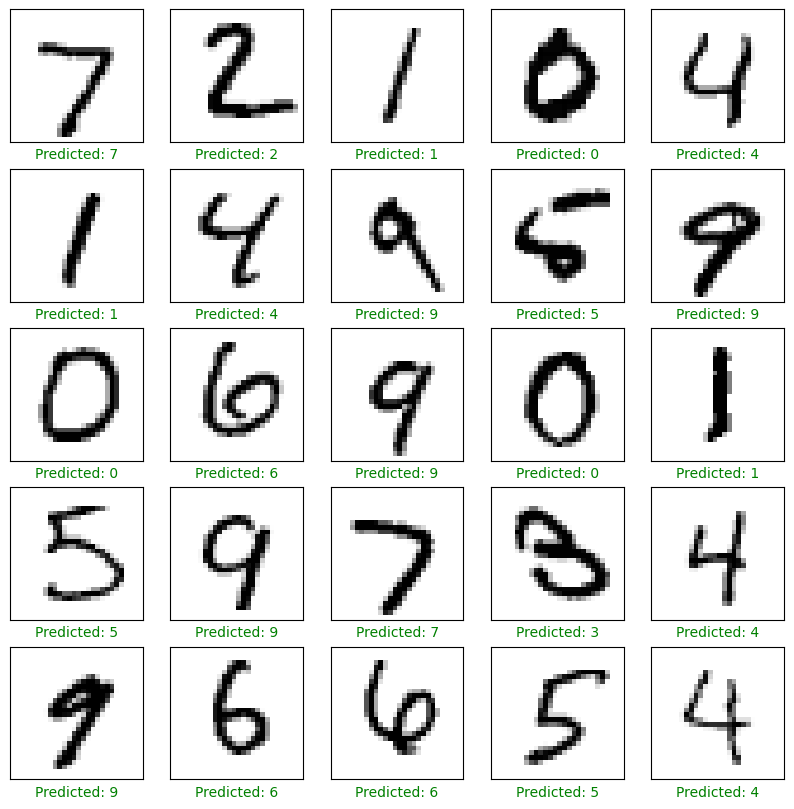

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

def load_mnist():
    # Load the MNIST dataset
    mnist = tf.keras.datasets.mnist
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    return train_images, train_labels, test_images, test_labels

def create_model(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        # Flatten layer
        layers.Flatten(),
        # Fully connected layers
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

def train_and_evaluate_model(train_images, train_labels, test_images, test_labels, num_epochs=5):
    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Reshape images for CNN input (add channel dimension)
    train_images = train_images.reshape((-1, 28, 28, 1))
    test_images = test_images.reshape((-1, 28, 28, 1))

    # Create the model
    model = create_model()

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=num_epochs, verbose=1)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

    print(f"Test accuracy: {test_acc}")

    return model

def visualize_predictions(model, test_images, test_labels):
    predictions = model.predict(test_images)
    num_images = min(len(test_images), 25)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = test_labels[i]
        if predicted_label == true_label:
            color = 'green'
        else:
            color = 'red'
        plt.xlabel(f"Predicted: {predicted_label}", color=color)
    plt.show()

# Load the MNIST dataset
train_images, train_labels, test_images, test_labels = load_mnist()

# Train and evaluate the model
model = train_and_evaluate_model(train_images, train_labels, test_images, test_labels)

# Visualize some predictions
visualize_predictions(model, test_images, test_labels)
